In [1]:
import pandas as pd 
file = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [2]:
file
file['bmi_group'] = 0

# Create Bmi Group 

In [3]:
#lets create bmi group column

file.loc[      (file['bmi']<18.5 ) ,      'bmi_group'     ] = 'Underweight'

file.loc[      (file['bmi']>=18.5 ) & (file['bmi']<25 ) ,      'bmi_group'     ] = 'Healthy_Weight'
file.loc[      (file['bmi']>=25 ) & (file['bmi']<30 ) ,      'bmi_group'     ] = 'Overweight'
file.loc[      (file['bmi']>=30 )  ,      'bmi_group'     ] = 'Obesity'

/tmp/ipykernel_13/3680471013.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Underweight' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  file.loc[      (file['bmi']<18.5 ) ,      'bmi_group'     ] = 'Underweight'


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

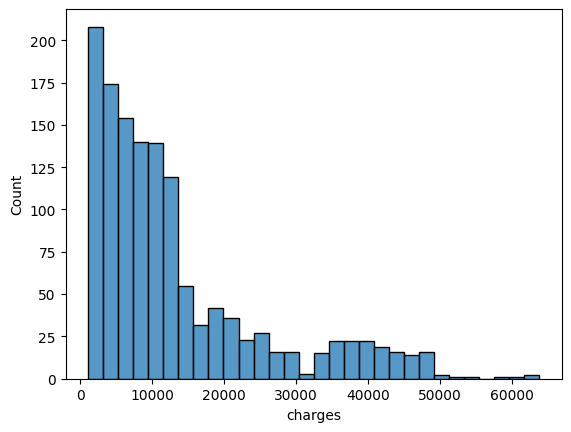

In [4]:
#lets create charges group column depending on charges distribution 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.histplot(data=file,x='charges')
file['charges'].describe()

# Create Charges Group 

In [5]:
#depending on the above we will create a group column for charges 
file['ch_group'] = 0
#file.loc[ (file['charges']< 4740 ) , 'ch_group' ] = 'Low_ charges'
file.loc[ (file['charges'] <4740 ) , 'ch_group' ] =  'low_ch'
file.loc[ (file['charges'] >=4740 )  & (file['charges'] <=16639 )   , 'ch_group' ] =  'Nor_ch'
file.loc[ (file['charges'] >16639 ) , 'ch_group' ] =  'Hi_ch'


/tmp/ipykernel_13/2909141610.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low_ch' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  file.loc[ (file['charges'] <4740 ) , 'ch_group' ] =  'low_ch'


# Compare Smokers Vs Non Smokers 

[Text(0, 25, '32050'), Text(0, 25, '8434')]

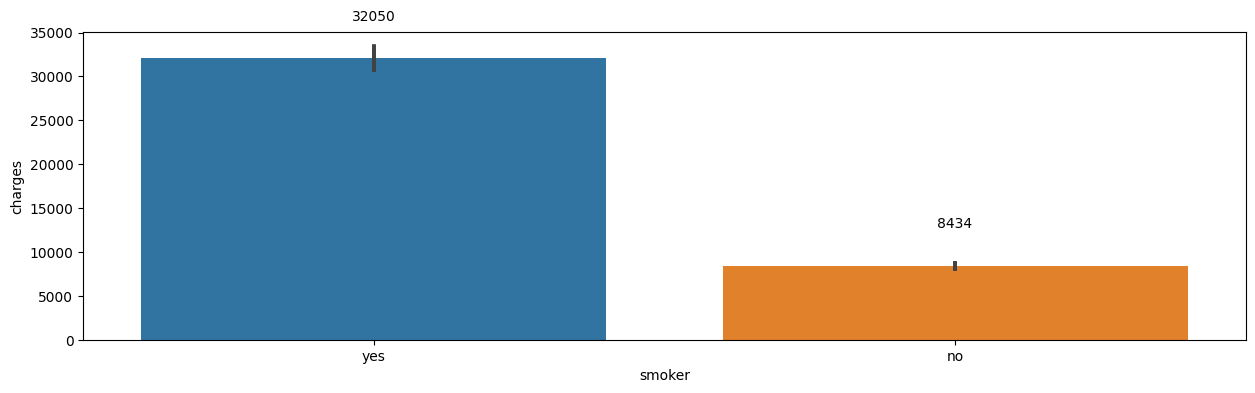

In [6]:
#average charges for smokers and non 



plt.figure(figsize=[15,4])
sns.barplot(data=file,x='smoker',y='charges',estimator='mean').bar_label(sns.barplot(data=file,x='smoker',y='charges',estimator='mean').containers[0],fmt=int,padding=25)

#below chat can give us indication as smoker can pay triple non smokers , okay lets check the business crowd from both types 

# Total Chages By Smokers Vs Average Charges 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


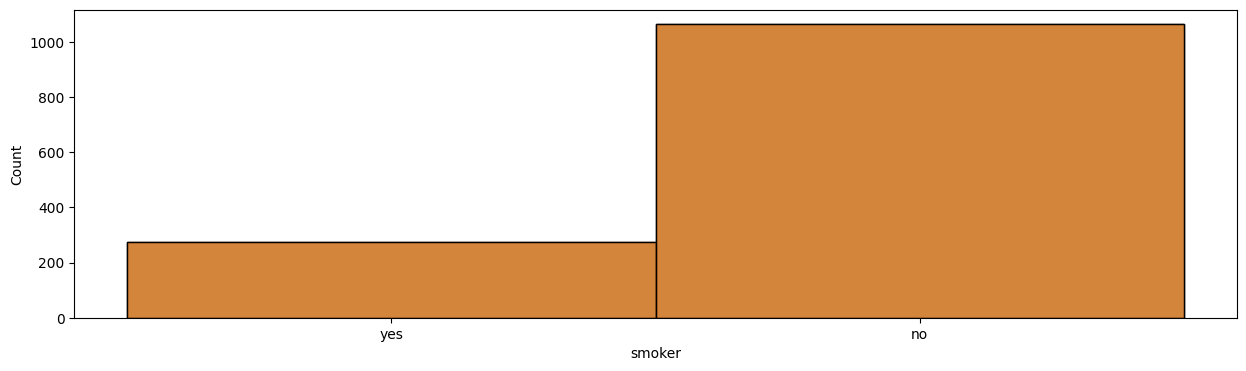

[Text(0, 8, '8781763'), Text(0, 8, '8974061')]

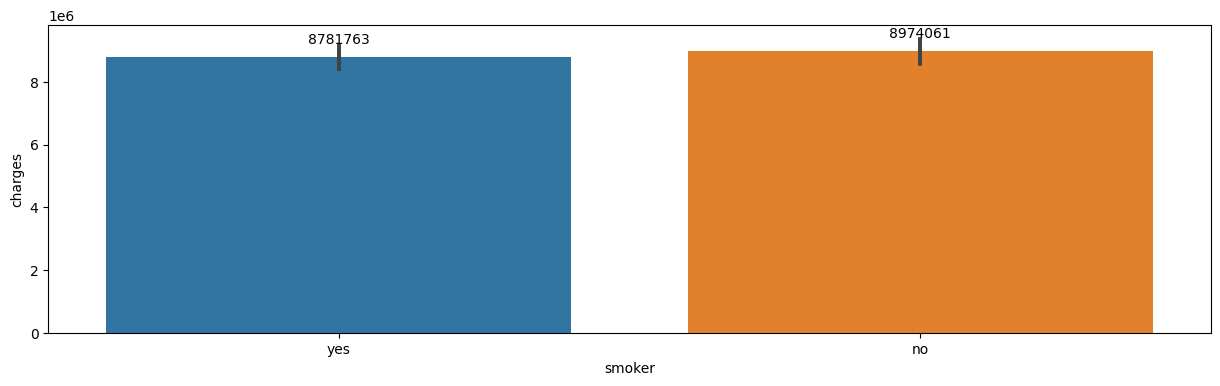

In [7]:
#  now we cmopare total count of smoker vs non smoker and total earned charges from both

#count of both 
plt.figure(figsize=[15,4])
sns.histplot(data=file,x='smoker').bar_label(sns.histplot(data=file,x='smoker').containers[0])
plt.show()
# as we see we have non smokers have more than smokers too much

# sum of charges 
plt.figure(figsize=[15,4])
sns.barplot(data=file,x='smoker',y='charges',estimator='sum').bar_label(sns.barplot(data=file,x='smoker',y='charges',estimator='sum').containers[0],fmt=int,padding=8)

#Okay Below plots shows that even we have more than 4 doubles for non smokers we an have massive charges from smokers as average shown above is 32050 for smokers and 8434 for non smokers 

# Combination

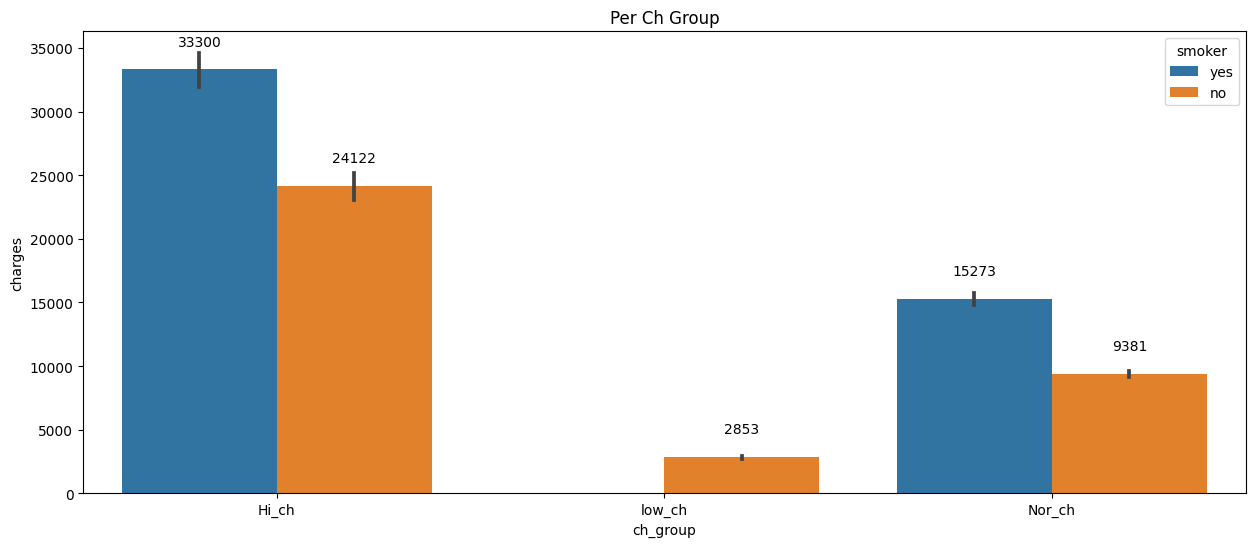

In [8]:
# Okay lets combine all above in 1 table 
file.groupby(['smoker']).agg({'smoker':'count','charges':'mean','charges':['mean','sum']}).reset_index().round(0)

#okay below shows that count and mean and sum of charges per smokers and non smikers 
#lets have final one 
plt.figure(figsize=[15,6])
lbar =  sns.barplot(data=file,x='ch_group',hue='smoker',y='charges')
for cont in lbar.containers:
    lbar.bar_label(cont,fmt=int,padding=15)
plt.title(label='Per Ch Group')
plt.show()
# as we can se we have no smokers in the mid range from 25% to 75 of charges range 


# Relation Of Age And Charges

<Axes: xlabel='age', ylabel='charges'>

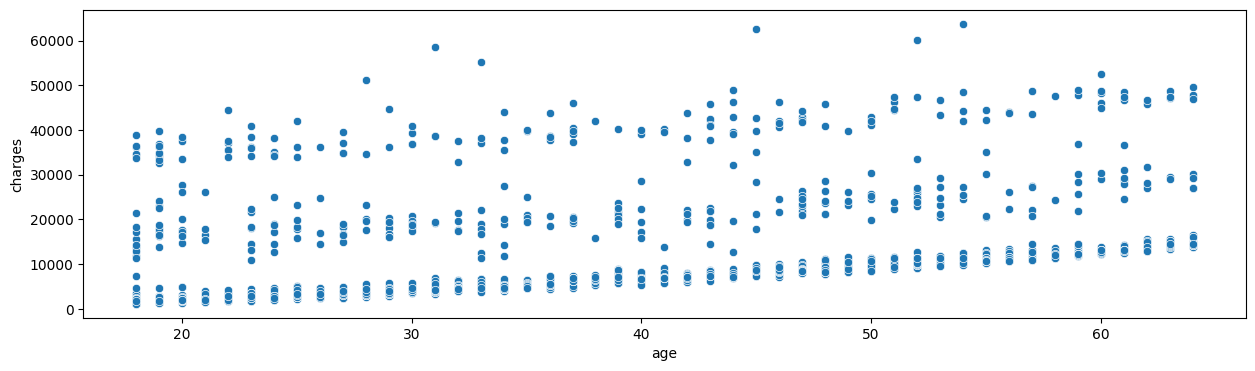

In [9]:
# lets check if we have relation betwee age and charges. 
pltdefaultsize =  plt.figure(figsize=[15,4])
pltdefaultsize
sns.scatterplot(data=file,x='age',y='charges')


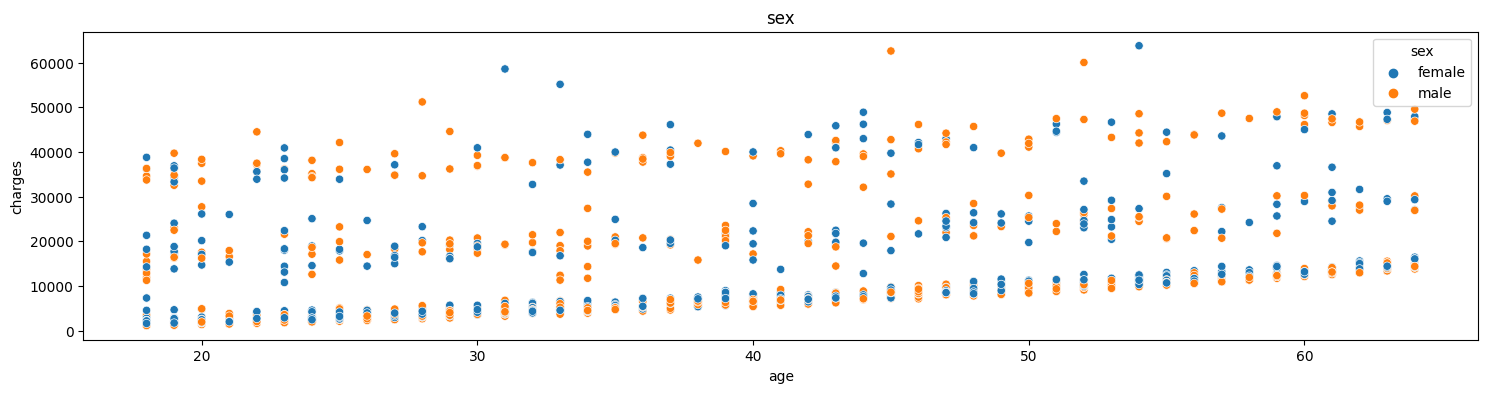

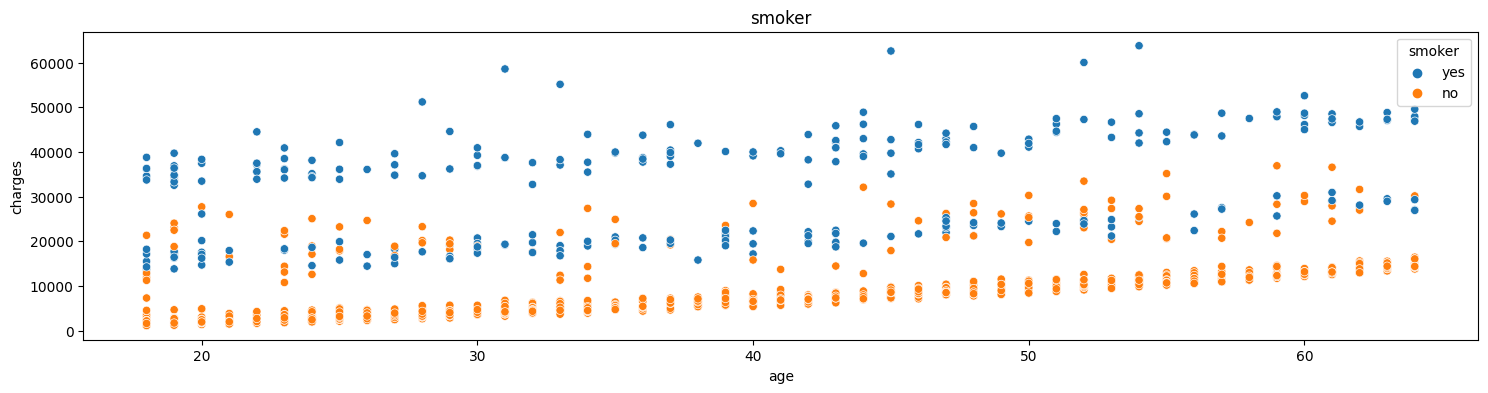

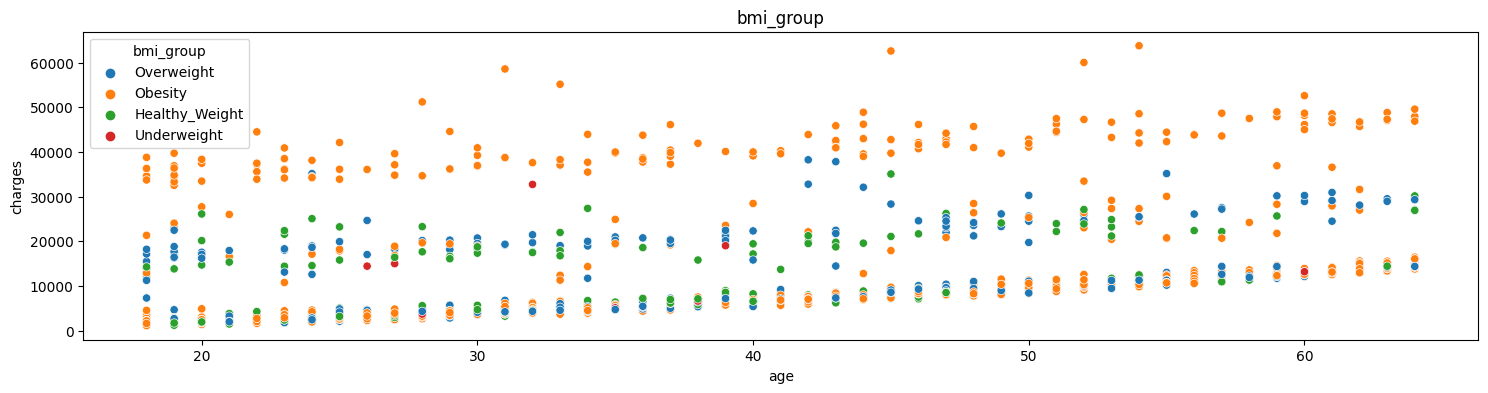

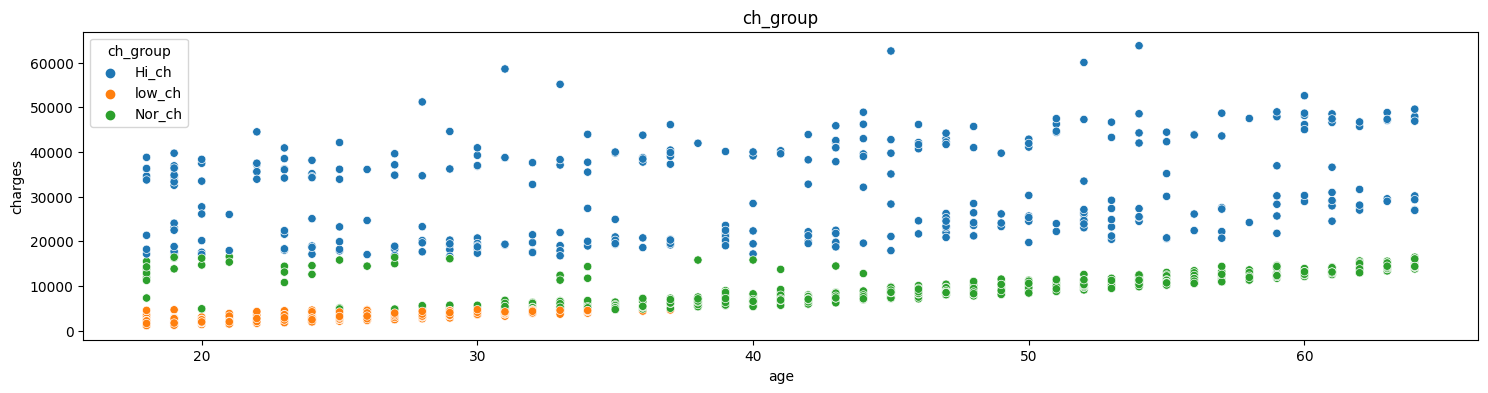

In [10]:
#okay lets create it with hue for our variables 
varlist =  ['sex','smoker','bmi_group','ch_group']
for var in varlist:
    plt.figure(figsize=[18,4])
    sns.scatterplot(data=file,x='age',y='charges',hue=var)
    plt.title(label=var)
    plt.show()

# Correlation


              age   charges
age      1.000000  0.627947
charges  0.627947  1.000000


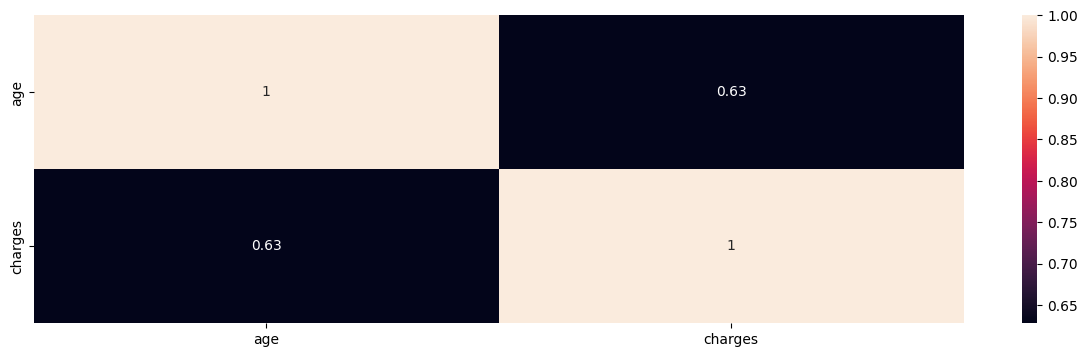

In [11]:
# play from above we have relation represented between charges and age in no smokers and normal charges group above 30age 
# we can have a correlation number with filtering on data for both cases 


#no smokers 
nofilter =  file.query('smoker  ==  "no" ')
print(nofilter[['age','charges']].corr())
plt.figure(figsize=[15,4])
sns.heatmap(data=nofilter[['age','charges']].corr(),annot=True)
plt.show()



              age   charges
age      1.000000  0.219716
charges  0.219716  1.000000


<Axes: >

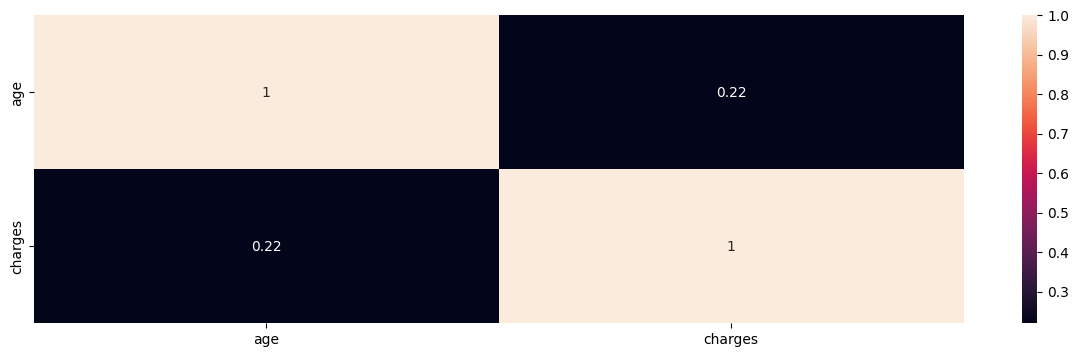

In [12]:
#now we create another one for correlation between age and charges for above 32 age
agefilter =  file.query(' age > 32    ')
print(agefilter[['age','charges']].corr())
plt.figure(figsize=[15,4])
sns.heatmap(data=agefilter[['age','charges']].corr(),annot=True)

# Charges Per Area

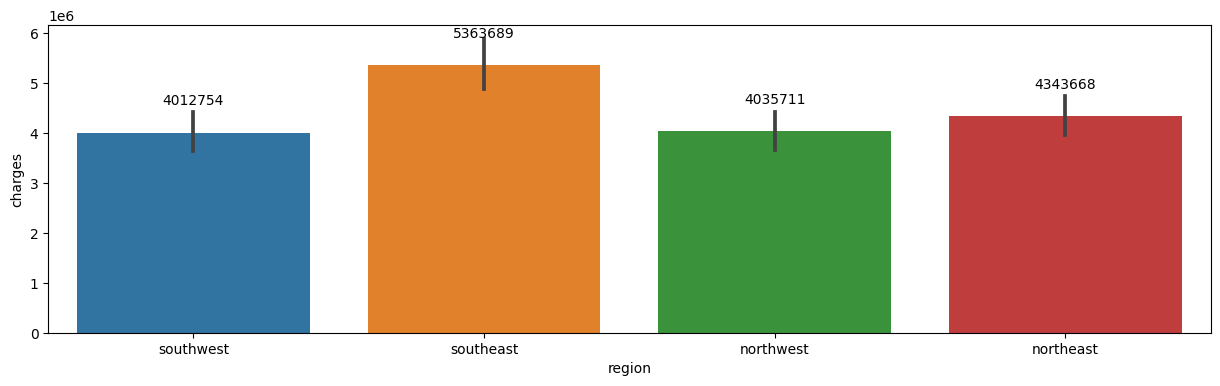

<Figure size 1500x1000 with 0 Axes>

,charges
region,
northeast,4343668
northwest,4035711
southeast,5363689
southwest,4012754


In [13]:
#check charges per area
plt.figure(figsize=[15,4])
lbar2 =  sns.barplot(data=file,x='region',y='charges',estimator='sum')

for x in lbar2.containers:
    plt.figure(figsize=[15,10])
    lbar2.bar_label(x,fmt=int,padding=18)
plt.show()

file.groupby(['region']).agg({'charges':'sum'}).astype('int')